In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  

In [2]:
collisions = pd.read_csv('collisions.csv', low_memory=False)
parties = pd.read_csv('parties.csv', low_memory=False)

# Collision Statistics and Probability Calculations

## GOAL: 
### We seek to explore our collision datasets in order to determine whether causes of collisions and the details collected about these collisions are consistent across age groups, or if there are unique and emerging themes about these collisions that emerge from the data.  This will help us to determine and better advise the State Officials on whether they should continue to advertise about collision awareness and driving habits in general terms across the entire population, or if these advertising campaigns should be more age specific.

#### Let's jump into the data ...

## Most Popular Crash Times - and what are the most likely times of fatality

In [27]:
# Group accidents by time of day by using the "collision_hour" column
times = collisions.groupby('collision_hour').agg({'case_id':'count'}).reset_index()

sorted_times = times.sort_values(by='case_id',ascending=False)
sorted_times.head(10)

,collision_hour,case_id
17,17,184967
15,15,177292
16,16,171345
14,14,153229
18,18,148170
13,13,134506
12,12,129138
8,8,125691
7,7,122018
11,11,113240


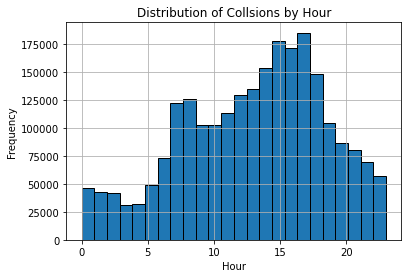

In [28]:
# Create a histogram of collision times
plt.hist(collisions['collision_hour'], bins=24, edgecolor='k')  
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.title('Distribution of Collsions by Hour')
plt.grid(True)

# Show the histogram
plt.show()

#### What we observe here makes sense when you consider how many cars would be on the roads at these various hours.  There are more drivers out during the day than there are in the evenings, particularly driving to work (7-10) and driving home from work (2-6).  So it stands to reason that we would expect to see more accidents occuring during these times.  I suspect we'd see more collisions caused by speeding in these hours to and from work (either late or really want to get home) and perhaps more accidents caused by falling asleep in the early morning hours just after midnight.  This is just speculation, but we can do better.  Let's check to see what the distribution of fatal accidents is.

In [34]:
# Group fatal accidents by time of day by using the "collision_hour" column
fatal_times = collisions[collisions['killed_victims'] > 0].groupby('collision_hour').agg({'case_id':'count'}).reset_index()

fatal_sorted_times = fatal_times.sort_values(by='case_id',ascending=False)
fatal_sorted_times.head(10)

,collision_hour,case_id
18,18,1276
20,20,1266
21,21,1228
19,19,1206
17,17,1093
22,22,1066
23,23,1019
16,16,893
0,0,861
1,1,849


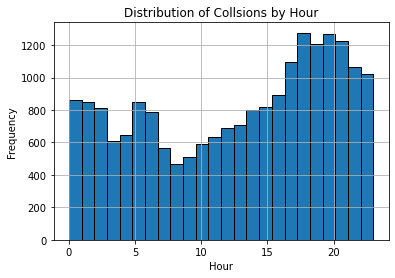

In [35]:
# Create a histogram of collision times
plt.hist(collisions.loc[collisions['killed_victims']>0,'collision_hour'], bins=24, edgecolor='k')  
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.title('Distribution of Collsions by Hour')
plt.grid(True)

# Show the histogram
plt.show()

#### We would have expected this trend to be similar (proportional) to the distribution for accidents, but during the early morning hours we find that the number of fatal collisions is disproportionately large since there are lass vehicles (and less collisions) during these hours.  So let's work out the proportion of accidents per hour.

In [42]:
# Merge the two DataFrames on 'collision_hour'
collisions_fatal_and_non = pd.merge(fatal_sorted_times, sorted_times, on='collision_hour', suffixes=('_fatal', '_all'), how='inner')

# Calculate the proportion (case_id_fatal / case_id_all)
collisions_fatal_and_non['proportion'] = collisions_fatal_and_non['case_id_fatal'] / collisions_fatal_and_non['case_id_all']

# Create a new DataFrame with the 'collision_hour' and 'proportion' columns
results_df = collisions_fatal_and_non[['collision_hour', 'proportion']].copy()

results_df.sort_values(by='proportion',ascending=False).head(10)

,collision_hour,proportion
17,4,0.020024
9,1,0.019907
12,2,0.019545
19,3,0.019343
8,0,0.018439
6,23,0.017852
10,5,0.017403
5,22,0.015354
2,21,0.015315
1,20,0.014600


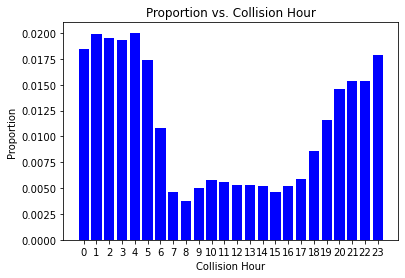

In [41]:
# Create a bar graph
plt.bar(results_df['collision_hour'], results_df['proportion'], color='blue')
plt.xlabel('Collision Hour')
plt.ylabel('Proportion')
plt.title('Proportion vs. Collision Hour')
plt.xticks(results_df['collision_hour'])  # Set x-axis ticks to match collision hours

# Show the plot
plt.show()

### Key Take-aways: 
#### - An accident that occurs in the early hours of the morning (between 1 - 4am) is up to 4x more likely to be fatal than accidents that occur in during peak traffic (between 3 - 6 pm).
#### - If the amount of cars on the road or even number of accidents per hour are not contributors to this observation, something else is causing this disproportionate rate in fatalites in the early morning collisions.  

### New Questions that emerge:
#### - Could it be the cause of the accident that drives this observation?  Is there more speeding, driving under the influence, tired driving happening during this time?
#### - Could it be that people display different driving habits and practices during these times, such as not wearing a seatbelt, or using their phones.
#### - Is this observation age specific?  Or is this proportionality consistent accross age groups?

## Let's perform the same operation of proportions of fatal collisions to collisions by hour, but by age ranges 10-29, 30-49, 50-69, 70+

In [48]:
# Collect the case_ids from parties table where the at fault person is between the ages ranges:
caseids_ages10to29 = parties.loc[(parties['party_age']>=10)&(parties['party_age']<30), 'case_id']
caseids_ages30to49 = parties.loc[(parties['party_age']>=30)&(parties['party_age']<50), 'case_id']
caseids_ages50to69 = parties.loc[(parties['party_age']>=50)&(parties['party_age']<70), 'case_id']
caseids_ages70plus = parties.loc[parties['party_age']>=70, 'case_id']

In [49]:
# Group accidents by time of day by using the "collision_hour" column
times_ages10to29 = collisions[collisions['case_id'].isin(caseids_ages10to29)].groupby('collision_hour').agg({'case_id':'count'}).reset_index()
times_ages30to49 = collisions[collisions['case_id'].isin(caseids_ages30to49)].groupby('collision_hour').agg({'case_id':'count'}).reset_index()
times_ages50to69 = collisions[collisions['case_id'].isin(caseids_ages50to69)].groupby('collision_hour').agg({'case_id':'count'}).reset_index()
times_ages70plus = collisions[collisions['case_id'].isin(caseids_ages70plus)].groupby('collision_hour').agg({'case_id':'count'}).reset_index()

In [51]:
# Group fatal accidents by time of day by using the "collision_hour" column
fatal_times_ages10to29 = collisions[(collisions['case_id'].isin(caseids_ages10to29))&(collisions['killed_victims'] > 0)].groupby('collision_hour').agg({'case_id':'count'}).reset_index()
fatal_times_ages30to49 = collisions[(collisions['case_id'].isin(caseids_ages30to49))&(collisions['killed_victims'] > 0)].groupby('collision_hour').agg({'case_id':'count'}).reset_index()
fatal_times_ages50to69 = collisions[(collisions['case_id'].isin(caseids_ages50to69))&(collisions['killed_victims'] > 0)].groupby('collision_hour').agg({'case_id':'count'}).reset_index()
fatal_times_ages70plus = collisions[(collisions['case_id'].isin(caseids_ages70plus))&(collisions['killed_victims'] > 0)].groupby('collision_hour').agg({'case_id':'count'}).reset_index()


In [52]:
# Merge the two DataFrames on 'collision_hour'
collisions_fatal_and_non_ages10to29 = pd.merge(fatal_times_ages10to29, times_ages10to29, on='collision_hour', suffixes=('_fatal', '_all'), how='inner')
collisions_fatal_and_non_ages30to49 = pd.merge(fatal_times_ages30to49, times_ages30to49, on='collision_hour', suffixes=('_fatal', '_all'), how='inner')
collisions_fatal_and_non_ages50to69 = pd.merge(fatal_times_ages50to69, times_ages50to69, on='collision_hour', suffixes=('_fatal', '_all'), how='inner')
collisions_fatal_and_non_ages70plus = pd.merge(fatal_times_ages70plus, times_ages70plus, on='collision_hour', suffixes=('_fatal', '_all'), how='inner')


In [53]:
# Calculate the proportion (case_id_fatal / case_id_all)
collisions_fatal_and_non_ages10to29['proportion'] = collisions_fatal_and_non_ages10to29['case_id_fatal'] / collisions_fatal_and_non_ages10to29['case_id_all']
collisions_fatal_and_non_ages30to49['proportion'] = collisions_fatal_and_non_ages30to49['case_id_fatal'] / collisions_fatal_and_non_ages30to49['case_id_all']
collisions_fatal_and_non_ages50to69['proportion'] = collisions_fatal_and_non_ages50to69['case_id_fatal'] / collisions_fatal_and_non_ages50to69['case_id_all']
collisions_fatal_and_non_ages70plus['proportion'] = collisions_fatal_and_non_ages70plus['case_id_fatal'] / collisions_fatal_and_non_ages70plus['case_id_all']


In [54]:
# Create a new DataFrame with the 'collision_hour' and 'proportion' columns
results_ages10to29 = collisions_fatal_and_non_ages10to29[['collision_hour', 'proportion']].copy()
results_ages30to49 = collisions_fatal_and_non_ages30to49[['collision_hour', 'proportion']].copy()
results_ages50to69 = collisions_fatal_and_non_ages50to69[['collision_hour', 'proportion']].copy()
results_ages70plus = collisions_fatal_and_non_ages70plus[['collision_hour', 'proportion']].copy()

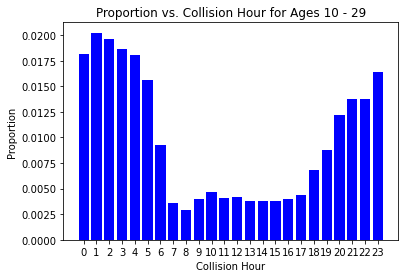

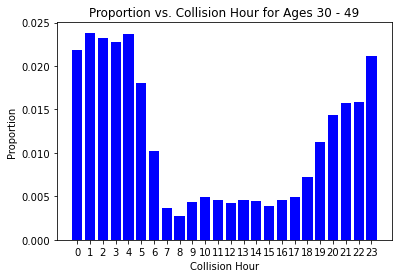

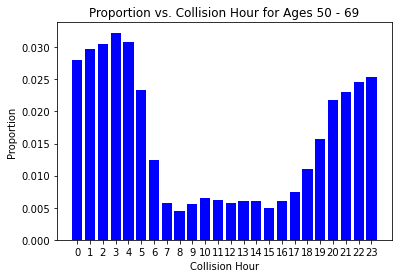

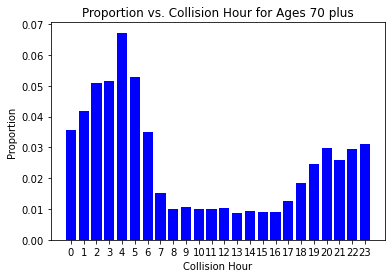

In [56]:
# Create a bar graph
plt.bar(results_ages10to29['collision_hour'], results_ages10to29['proportion'], color='blue')
plt.xlabel('Collision Hour')
plt.ylabel('Proportion')
plt.title('Proportion vs. Collision Hour for Ages 10 - 29')
plt.xticks(results_ages10to29['collision_hour'])  # Set x-axis ticks to match collision hours

# Show the plot
plt.show()

plt.bar(results_ages30to49['collision_hour'], results_ages30to49['proportion'], color='blue')
plt.xlabel('Collision Hour')
plt.ylabel('Proportion')
plt.title('Proportion vs. Collision Hour for Ages 30 - 49')
plt.xticks(results_ages30to49['collision_hour'])  # Set x-axis ticks to match collision hours

# Show the plot
plt.show()

plt.bar(results_ages50to69['collision_hour'], results_ages50to69['proportion'], color='blue')
plt.xlabel('Collision Hour')
plt.ylabel('Proportion')
plt.title('Proportion vs. Collision Hour for Ages 50 - 69')
plt.xticks(results_ages50to69['collision_hour'])  # Set x-axis ticks to match collision hours

# Show the plot
plt.show()

plt.bar(results_ages70plus['collision_hour'], results_ages70plus['proportion'], color='blue')
plt.xlabel('Collision Hour')
plt.ylabel('Proportion')
plt.title('Proportion vs. Collision Hour for Ages 70 plus')
plt.xticks(results_ages70plus['collision_hour'])  # Set x-axis ticks to match collision hours

# Show the plot
plt.show()

### We can see that, although the general shape of the trend is similar for the different age ranges, the likelihood of a collision being fatal does change.

#### - Here we see that ages 30 - 49 are 5 times more likely to have a fatal collision in the early morning hours than during peak rush hour times.
#### - Ages 50-69 are 6 times more likely to have a fatal collision in the early morning hours than during peak rush hour times, and 
#### - Ages 70+ are up to 7 times more likely to have fatal collision in the early morning hours than during peak rush hours times

## Let's simply take the average fatality rates for all hours for each of the different age groups to compare these rates to one another

In [60]:
## We can use our already existing proportionality tables to determine the average fatality rates for each age group.
age_ranges = ['10 - 29', '30 - 49', '50 - 69', '70 +']
average_fatality_rates = []
average_fatality_rates.append(results_ages10to29['proportion'].agg('average'))
average_fatality_rates.append(results_ages30to49['proportion'].agg('average'))
average_fatality_rates.append(results_ages50to69['proportion'].agg('average'))
average_fatality_rates.append(results_ages70plus['proportion'].agg('average'))

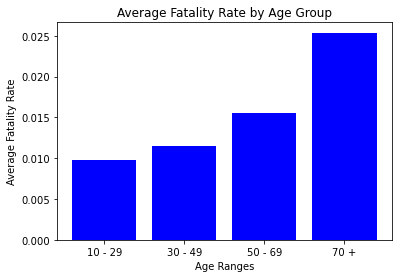

In [61]:
plt.bar(age_ranges, average_fatality_rates, color='blue')
plt.xlabel('Age Ranges')
plt.ylabel('Average Fatality Rate')
plt.title('Average Fatality Rate by Age Group')
plt.xticks(age_ranges)  # Set x-axis ticks to match collision hours

# Show the plot
plt.show()

#### As a reminder, here is the number of collisions by age group:

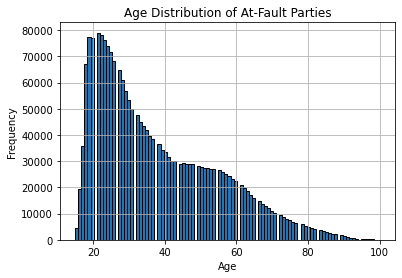

In [62]:
#Check the ages of all the people who were at fault in a collision again
at_fault_ages = parties.loc[parties['at_fault']==1, 'party_age']

# Create a histogram of at_fault_ages
plt.hist(at_fault_ages, bins=100, edgecolor='k')  # Adjust the number of bins as needed
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of At-Fault Parties')
plt.grid(True)

# Show the histogram
plt.show()

### When comparing these charts next to eachother, we can see that the as age increases the number of collisions decreases.  This might cause us to believe that the most dangerous drivers on the roads are ages 15 - 30.  However, when we look at the fatality rates, we see that the older someone gets, the more likely their collision will result in a fatality.  These two graphs are inversely proportional to one another.  So even though there may be more accidents caused by younger drivers, we see that the nature of collisions grow increasingly more fatal as drivers get older.

### Admittedly, there may be other factors at play here.  It could be something as simple as the older you get, the more frail you get, and thus are more likely to be killed in an accident.  Although, the underlying issues that cause this observation is likely more complicated than that.

### Let's dive a little deeper into the causes of collisions by age group.

In [64]:
# Group accidents by time of day by using the "collision_hour" column
times = collisions.groupby(['pcf_violation_category','collision_hour']).agg({'case_id':'count'}).reset_index()

In [65]:
times

,pcf_violation_category,collision_hour,case_id
0,22350,16,1
1,automobile right of way,0,1411
2,automobile right of way,1,795
3,automobile right of way,2,620
4,automobile right of way,3,480
...,...,...,...
517,wrong side of road,19,1937
518,wrong side of road,20,1594
519,wrong side of road,21,1336
520,wrong side of road,22,1067


In [68]:
grouped = times.groupby(['pcf_violation_category', 'collision_hour'])['case_id'].sum().reset_index()

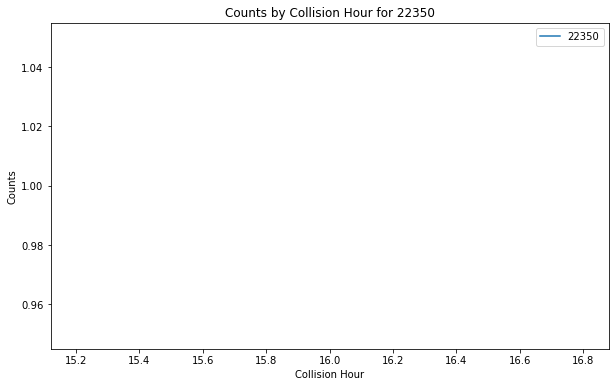

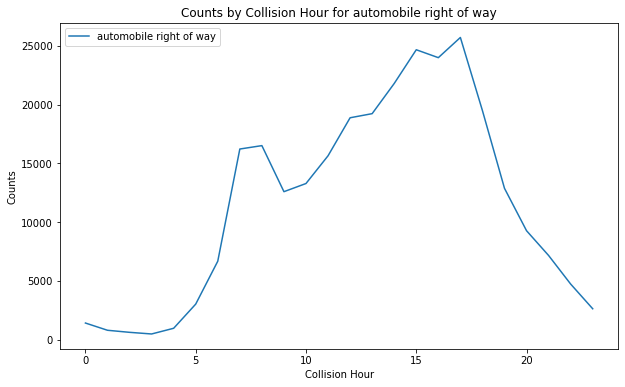

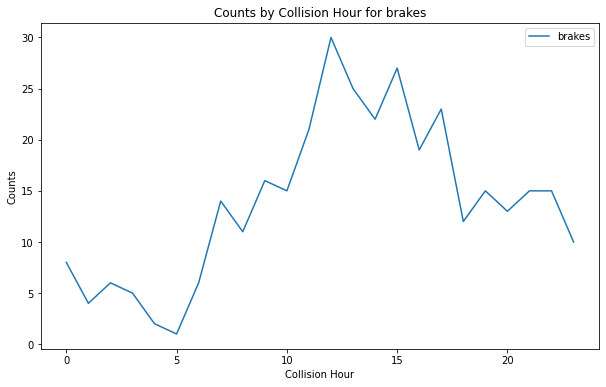

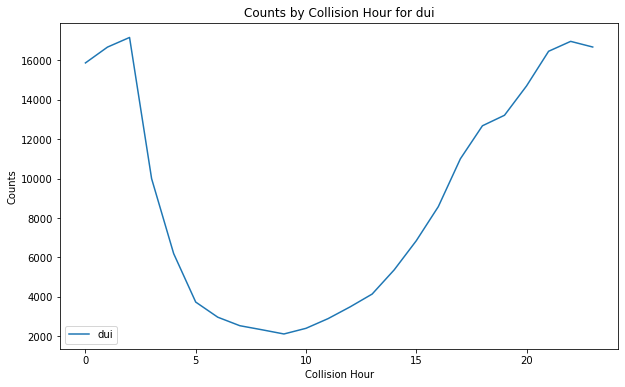

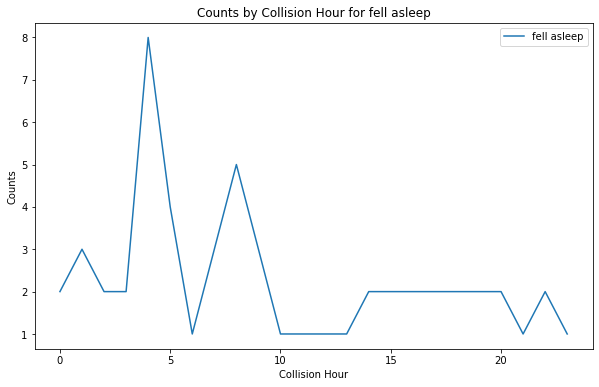

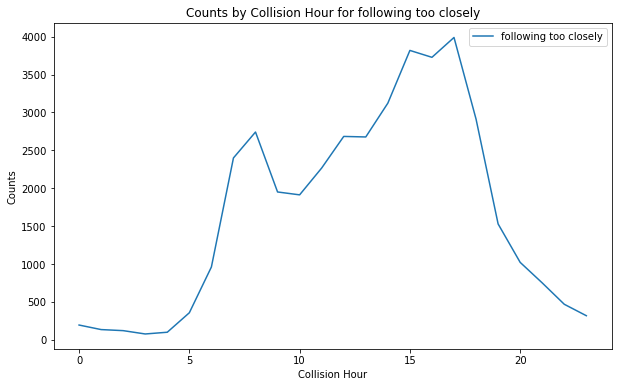

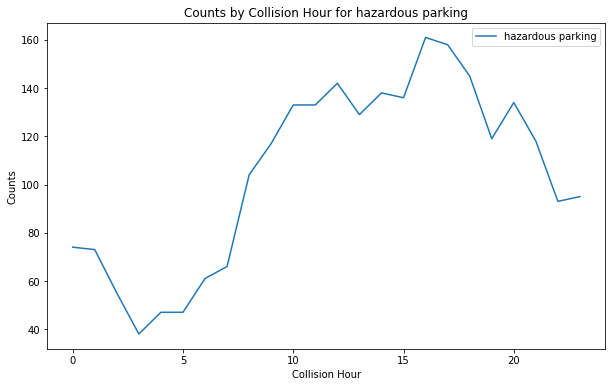

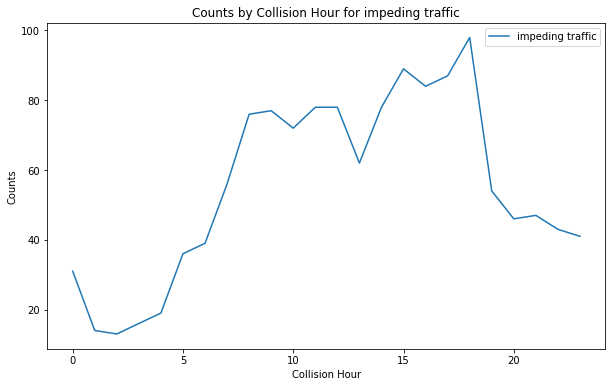

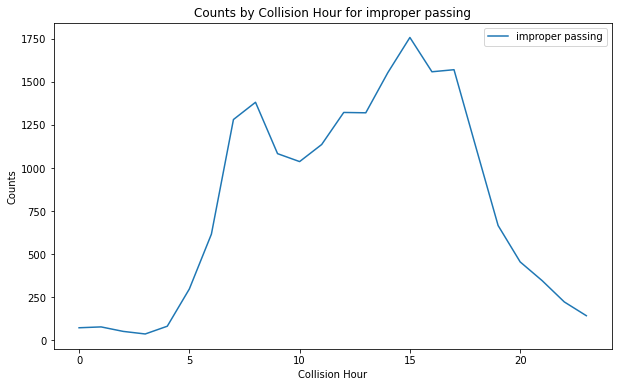

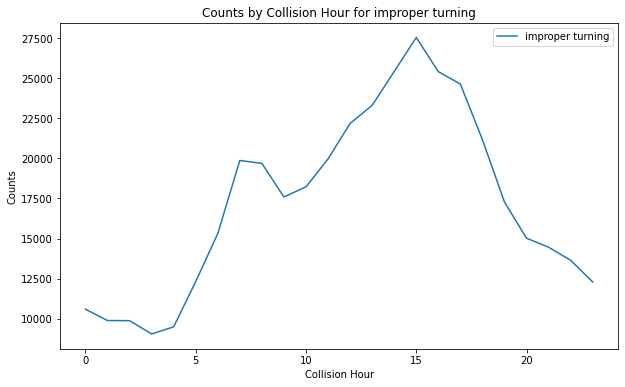

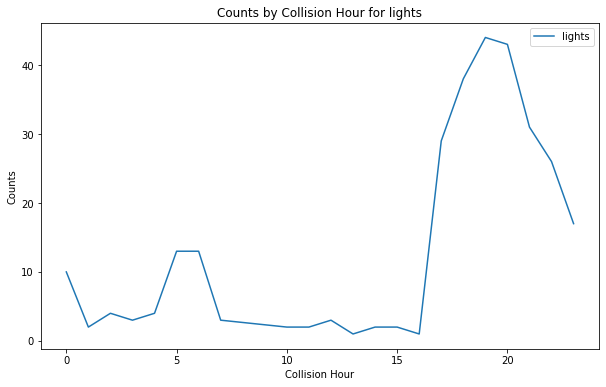

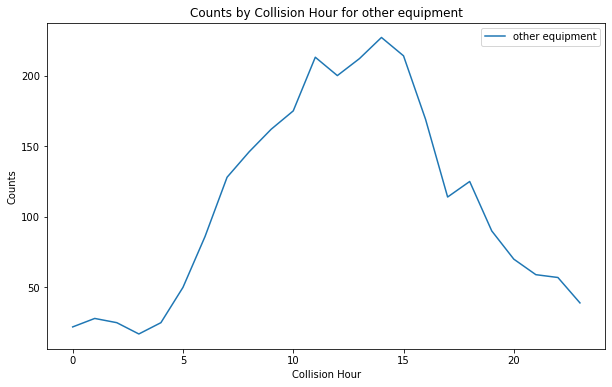

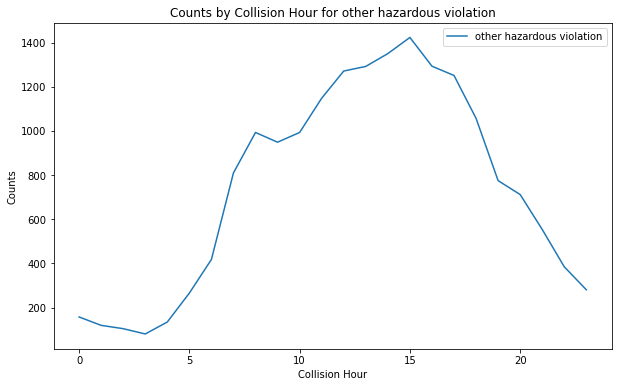

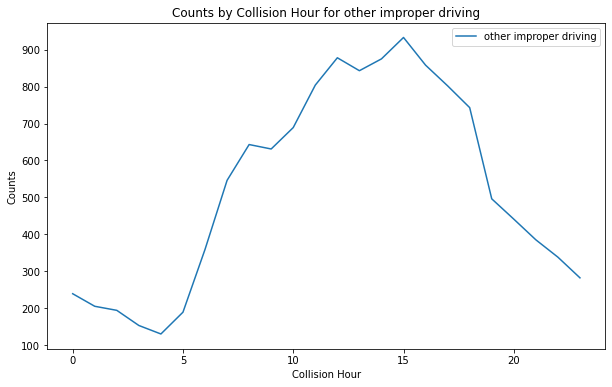

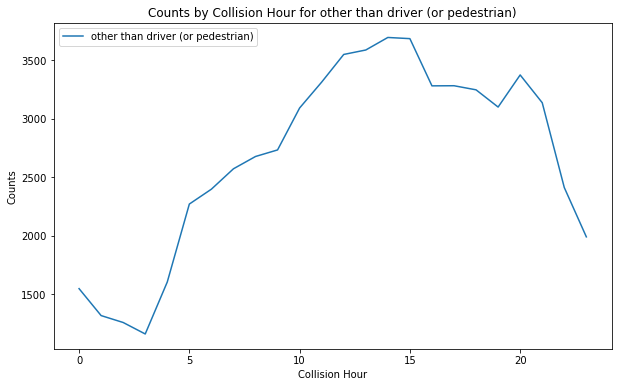

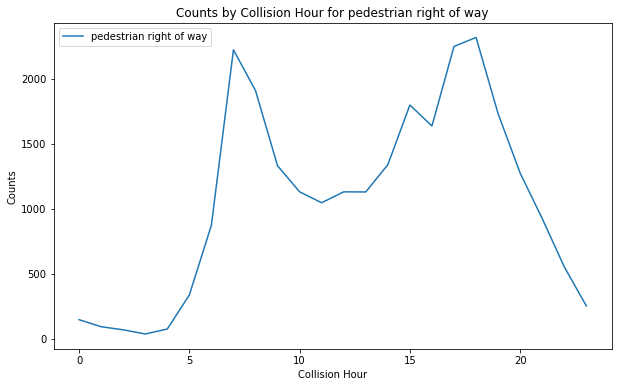

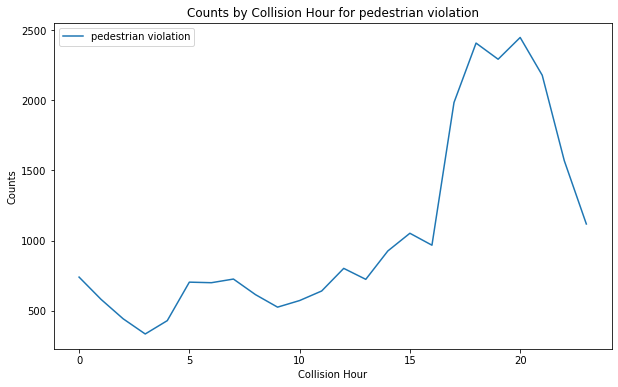

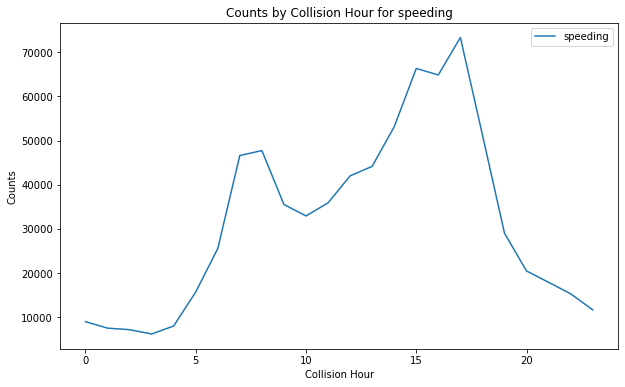

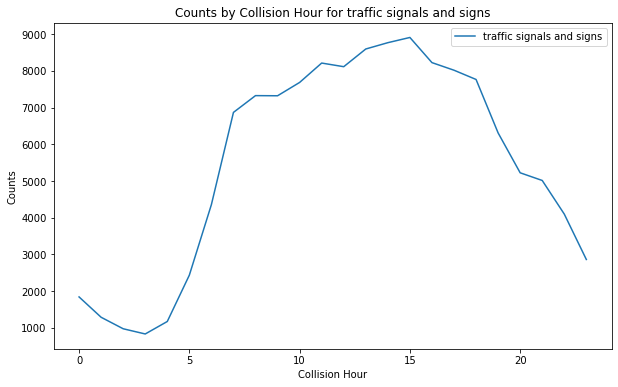

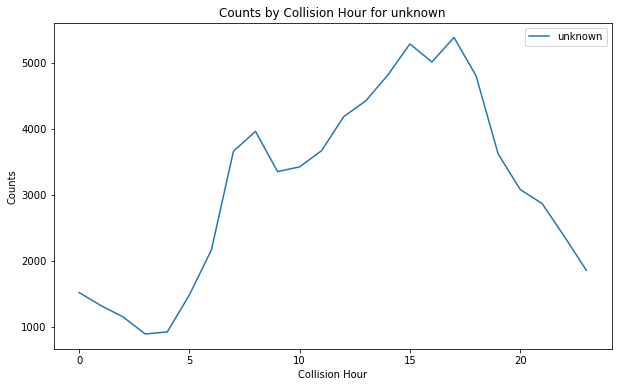

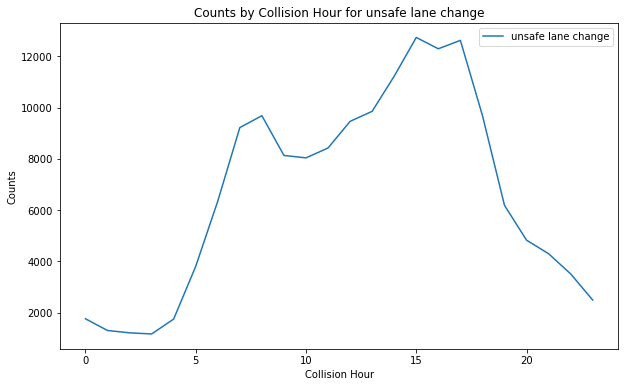

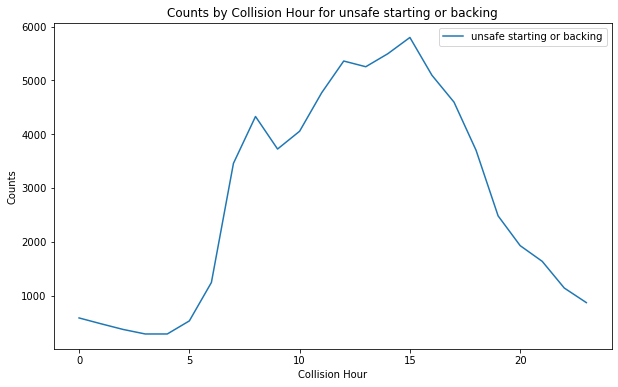

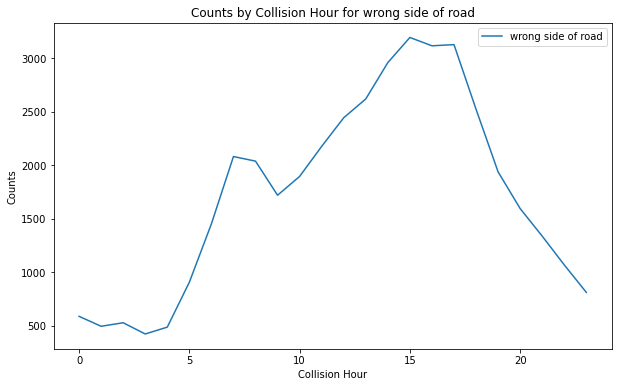

In [70]:
unique_categories = times['pcf_violation_category'].unique()

for category in unique_categories:
    plt.figure(figsize=(10, 6))
    data_to_plot = grouped[grouped['pcf_violation_category'] == category]
    
    # Using seaborn for plot
    sns.lineplot(x='collision_hour', y='case_id', data=data_to_plot, label=category)
    
   
    plt.xlabel('Collision Hour')
    plt.ylabel('Counts')
    plt.title(f'Counts by Collision Hour for {category}')
    plt.legend()
    plt.show()

### For the most part, these results are not surprising since many of these trends follow the trend of collisions per hour.  It makes sense that the distribution for each cause of collision by the hour would occur during heavier traffic times, such as: unsafe starting or backing, improper driving, turning, or passing, speeding, etc.  However, we see a few unique trends that do no follow this trend, such as: 

#### 1. Pedestrian violations and lighting - which appear to occur during the evening when the sun is going down or it's already dark.  This is not a surprise, however, this may be more prevelant in different age groups.

#### 2. DUIs (Driving Under the Influence) - there is substantially more collisions caused by this in the evening and early morning hours.  This is also not much a surprise since most people would reserve their drinking to the evenings.  However, the trend does start to really pick up in the early afternoon, not just after regular working hours.  Again, it'd be interesting to know if this is an age fueled propblem, or even gender fueled.

#### 3. Falling Asleep - This is mostly observed in the early morning hours when people would typically be more tired.  

## Let's dig a little deeper into what the distribution of ages are when it comes to alcohol involvement in collisions.

In [85]:
# Find all the cases in collisions where alcohol was involved
alchohol_cases = collisions[collisions['alcohol_involved']==1]

In [86]:
#Create a list of case_ids of these cases to cross reference with the parties table that has the ages
case_ids = alchohol_cases['case_id'].unique()

In [87]:
#Use these inque case ids to find all the ages of persons involved with alcohol
alcohol_ages = parties.loc[(parties['at_fault']==1) & (parties['case_id'].isin(case_ids)), 'party_age']

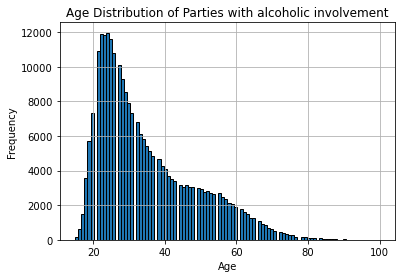

In [88]:
# Create a histogram of alcohol_ages
plt.hist(alcohol_ages, bins=100, edgecolor='k')  # Adjust the number of bins as needed
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Parties with alcoholic involvement')
plt.grid(True)

# Show the histogram
plt.show()

### This distribution is essentially identical in shape to the distribution of ages involved in collisions.  Clearly, the younger population is more likely to drive after drinking than the older population.  Let's look into the DUIs specifically.  While alcohol involvement may be more prevelant amongst the younger population, it may not be the case that they are driving over the legal alcohol consumption limits.

In [91]:
# Find all the cases in collisions where a DUI was the cause of collision
dui_cases = collisions[collisions['pcf_violation_category']=='dui']

#Create a list of case_ids of these cases to cross reference with the parties table that has the ages
case_ids = dui_cases['case_id'].unique()

#Use these inque case ids to find all the ages of persons involved with alcohol
dui_ages = parties.loc[(parties['at_fault']==1) & (parties['case_id'].isin(case_ids)), 'party_age']

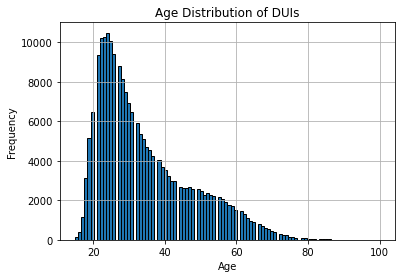

In [92]:
# Create a histogram of dui_ages
plt.hist(dui_ages, bins=100, edgecolor='k')  # Adjust the number of bins as needed
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of DUIs')
plt.grid(True)

# Show the histogram
plt.show()

### Indeed, the trend is the same.  At first glance, this appears to be more of a problem amongst the younger generations.  However, in order to get a more accurate picture, we should instead compare these numbers of duis to the numbers of collisions for each age group.  This normalizes the data since we already have a disproportionate amount of accidents caused by these younger drivers.   

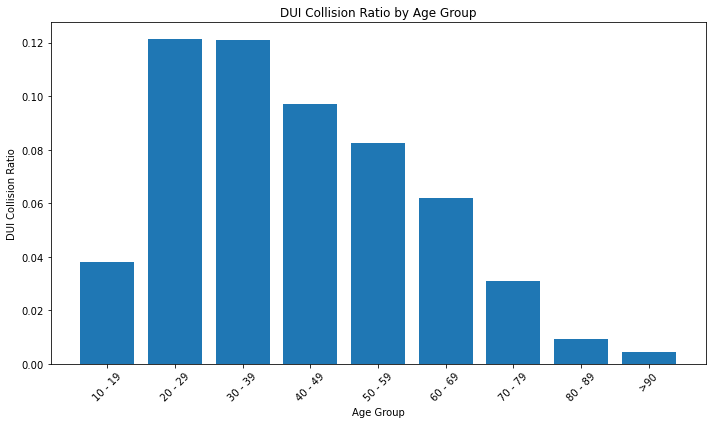

In [96]:
# Merge the two DataFrames based on 'case_id'
merged_data = pd.merge(collisions, parties, on='case_id')

# Filter for DUI violations and at-fault collisions
filtered_data = merged_data[(merged_data['pcf_violation_category'] == 'dui') & (merged_data['at_fault'] == 1)]

# Group by 'age_group' and count the number of rows
dui_collision_counts = filtered_data.groupby('age_range').size().reset_index(name='dui_collisions')

# Calculate the total number of at-fault collisions for each age group
total_at_fault_collisions = merged_data[merged_data['at_fault'] == 1].groupby('age_range').size().reset_index(name='total_at_fault_collisions')

# Divide DUI collision counts by total at-fault collisions
result_data = pd.merge(dui_collision_counts, total_at_fault_collisions, on='age_range')
result_data['dui_ratio'] = result_data['dui_collisions'] / result_data['total_at_fault_collisions']

# Step 6: Create a graph to visualize the results
plt.figure(figsize=(10, 6))
plt.bar(result_data['age_range'], result_data['dui_ratio'])
plt.xlabel('Age Group')
plt.ylabel('DUI Collision Ratio')
plt.title('DUI Collision Ratio by Age Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### This gives us a clear answer now that DUIs are more prevalent amongst the younger generations.

### Key-Insights:
#### - Ages 20-40 are 20% more likely to be driving under the influence than a person in their 40s, 50% more likely to be driving under the influence than a person in their 50s, and 100% more likely to be driving under the influence than a person in their 60s.

## Let's now dig a little deeper into falling asleep behind the wheel.  We will use the same code and tactics as before to observe which ages this is most prevalent in.

In [94]:
# Find all the cases in collisions where falling asleep behind the wheel was the cause of collision
sleep_cases = collisions[collisions['pcf_violation_category']=='fell asleep']

#Create a list of case_ids of these cases to cross reference with the parties table that has the ages
case_ids = sleep_cases['case_id'].unique()

#Use these inque case ids to find all the ages of persons involved with alcohol
sleep_ages = parties.loc[(parties['at_fault']==1) & (parties['case_id'].isin(case_ids)), 'party_age']

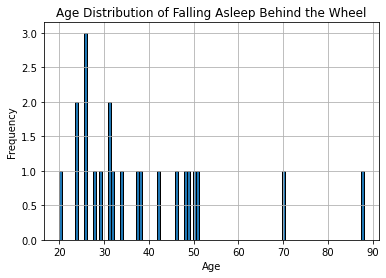

In [95]:
# Create a histogram of sleep_ages
plt.hist(sleep_ages, bins=100, edgecolor='k')  # Adjust the number of bins as needed
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Falling Asleep Behind the Wheel')
plt.grid(True)

# Show the histogram
plt.show()

### Let's check the ratio of falling asleep behind the wheel for the different age groups

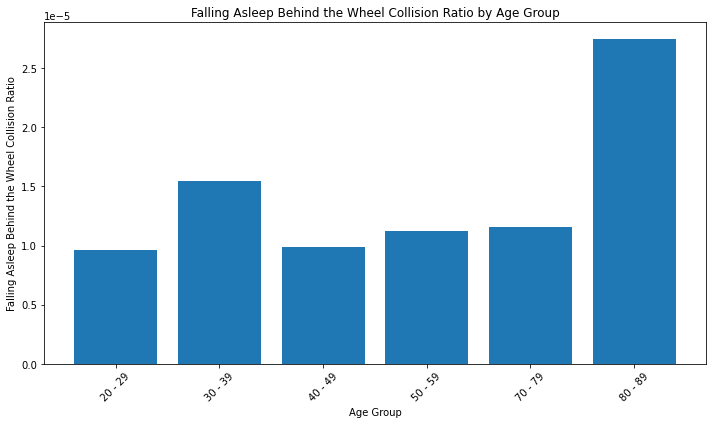

In [97]:
# Merge the two DataFrames based on 'case_id'
merged_data = pd.merge(collisions, parties, on='case_id')

# Filter for falling asleep behind the wheel violations and at-fault collisions
filtered_data = merged_data[(merged_data['pcf_violation_category'] == 'fell asleep') & (merged_data['at_fault'] == 1)]

# Group by 'age_group' and count the number of rows
sleep_collision_counts = filtered_data.groupby('age_range').size().reset_index(name='sleep_collisions')

# Calculate the total number of at-fault collisions for each age group
total_at_fault_collisions = merged_data[merged_data['at_fault'] == 1].groupby('age_range').size().reset_index(name='total_at_fault_collisions')

# Divide sleep collision counts by total at-fault collisions
result_data = pd.merge(sleep_collision_counts, total_at_fault_collisions, on='age_range')
result_data['sleep_ratio'] = result_data['sleep_collisions'] / result_data['total_at_fault_collisions']

# Step 6: Create a graph to visualize the results
plt.figure(figsize=(10, 6))
plt.bar(result_data['age_range'], result_data['sleep_ratio'])
plt.xlabel('Age Group')
plt.ylabel('Falling Asleep Behind the Wheel Collision Ratio')
plt.title('Falling Asleep Behind the Wheel Collision Ratio by Age Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### The ratios are fairly even across the age-groups, but we do see a small uptick in drivers betwee nthe ages of 30-39, but a major increase (by nearly 3 times) in the 80-89 range.  Thus, more of an issue for the more aged population than it is for the younger population.

# Conclusions

### While this has not been an exhaustive exploration into every cause of collision, it's been made clear that there are certain causes of collision that are more prevalant for one age group that is not as prevalent for the next.  Some groups are more prone to driving under the influence, while others are more prone to falling asleep behind the wheel.  Thus, when it comes to marketing and advertising campaigns designed to inform the public in order to minimize accidents and the injuries/fatalities caused by them, a one-size-all approach may not be the most effective method.  We should instead be tailoring the advertisments to speak directly to the different age-groups in order to capture more people's attention, whereby being more effective in generating awareness of collisions and hopefully encourage better driving habits. 

# Next Steps:

### We will use Tableau to create dashboards for our State officials to use and interact with to glean more specific collision details for each age-group.